In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)

(7000, 300)
(7000,)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    kfold_data_id = []
    id_set = []
    data_length = x_train.shape[0]
    for i in range (data_length):
        id_set.append(i)
    id_set = np.array(id_set)
    np.random.shuffle(id_set)
    # print("id_set: ", id_set)
    left_number = data_length % k
    fold_size = data_length // k
    start = 0
    end = 0
    for i in range(1, k+1, 1):
        each_fold = []
        # 找出每次當 validation 的區間，區間以外的是 train
        # start = int((i-1) * data_length/k)
        # end = int((i) * data_length/k)
        if(left_number > 0):
            end = start + fold_size + 1
            left_number -= 1
        else:
            end = start + fold_size

        # print("start, end: ", start, ", ", end)
        each_fold.append(np.sort(np.append(id_set[0:start], id_set[end:])))  # train
        each_fold.append(np.sort(id_set[start:end]))  # validation
        # print("Split: %s, Training index: %s, Validation index: %s" % (i, each_fold[0], each_fold[1]))
        kfold_data_id.append(each_fold)
        start = end
    
    return kfold_data_id

In [6]:
X = np.arange(20)
kfold_data = cross_validation(X, None, k=5) # k = 10 (original)

In [7]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

In [ ]:
for i in range(len(kfold_data)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, kfold_data[i][0], kfold_data[i][1]))

## example

In [9]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  5  6  7  8 10 11 12 13 14 15 16 17 18 19], Validation index: [2 3 4 9]
Split: 2, Training index: [ 1  2  3  4  5  6  7  8  9 10 11 12 15 17 18 19], Validation index: [ 0 13 14 16]
Split: 3, Training index: [ 0  1  2  3  4  6  7  8  9 12 13 14 15 16 17 18], Validation index: [ 5 10 11 19]
Split: 4, Training index: [ 0  1  2  3  4  5  7  8  9 10 11 13 14 16 17 19], Validation index: [ 6 12 15 18]
Split: 5, Training index: [ 0  2  3  4  5  6  9 10 11 12 13 14 15 16 18 19], Validation index: [ 1  7  8 17]


In [10]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [11]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [12]:
k = 5
kfold_data = cross_validation(x_train, y_train, k)

In [13]:
x_fold_train = []  # len = 5
y_fold_train = []  # len = 5

x_fold_val = []  # len = 5
y_fold_val = []  # len = 5

for i in range(5):
    train_index = kfold_data[i][0]
    x_single_fold = []
    y_single_fold = []
    for id in train_index:
        x_single_fold.append(x_train[id, ])
        y_single_fold.append(y_train[id, ])

    x_single_fold = np.array(x_single_fold)
    y_single_fold = np.array(y_single_fold)
    x_fold_train.append(x_single_fold)
    y_fold_train.append(y_single_fold)

    val_index = kfold_data[i][1]
    x_single_fold = []
    y_single_fold = []
    for id in val_index:
        x_single_fold.append(x_train[id, ])
        y_single_fold.append(y_train[id, ])

    x_single_fold = np.array(x_single_fold)
    y_single_fold = np.array(y_single_fold)
    x_fold_val.append(x_single_fold)
    y_fold_val.append(y_single_fold)

In [14]:
print("len(x_fold_train): ", len(x_fold_train), " | len(y_fold_train): ", len(y_fold_train))
print("x_fold_train[0].shape: ", x_fold_train[0].shape, " | y_fold_train.shape: ", y_fold_train[0].shape)
print("-----------------------------------------------------------------")
print("len(x_fold_val): ", len(x_fold_val), " | len(y_fold_val): ", len(y_fold_val))
print("x_fold_val[0].shape: ", x_fold_val[0].shape, " | y_fold_val.shape: ", y_fold_val[0].shape)

len(x_fold_train):  5  | len(y_fold_train):  5
x_fold_train[0].shape:  (5600, 300)  | y_fold_train.shape:  (5600,)
-----------------------------------------------------------------
len(x_fold_val):  5  | len(y_fold_val):  5
x_fold_val[0].shape:  (1400, 300)  | y_fold_val.shape:  (1400,)


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
## your code
# 1. 先決定 gamma & c
# 2. loop 過去 gamma & c, 每一個 gamma & c 都對 split 出來的五組資料進行預測，預測完將五組資料的準確度做平均
gamma = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
c = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
acc = np.zeros((len(c), len(gamma)))

best_gamma = None
best_c = None
best_acc = 0

for i in range(len(gamma)):
    for j in range(len(c)):
        # train, predict, count for acc on each fold respectively
        for id in range(k): # index for data set
            clf = SVC(C=c[j], kernel='rbf', gamma=gamma[i]) # 每次都要用一個新的去 fit -> same model train for all fold on same para
            clf.fit(x_fold_train[id], y_fold_train[id])
            y_pred = clf.predict(x_fold_val[id])
            acc[j][i] += accuracy_score(y_fold_val[id], y_pred)
        acc[j][i] /= k
        
        if acc[j][i] > best_acc:
            best_acc = acc[j][i]
            best_gamma = gamma[i]
            best_c = c[j]

print(acc)       

[[0.99357143 0.99257143 0.99085714 0.982      0.70414286 0.54914286
  0.492      0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98228571 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.991      0.98214286 0.736      0.55142857
  0.49257143 0.49171429]]


In [21]:
# print the best parameters I find
print("best parameters: c: ", best_c, " , gamma: ",best_gamma)

best parameters: c:  1.0  , gamma:  0.0001


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

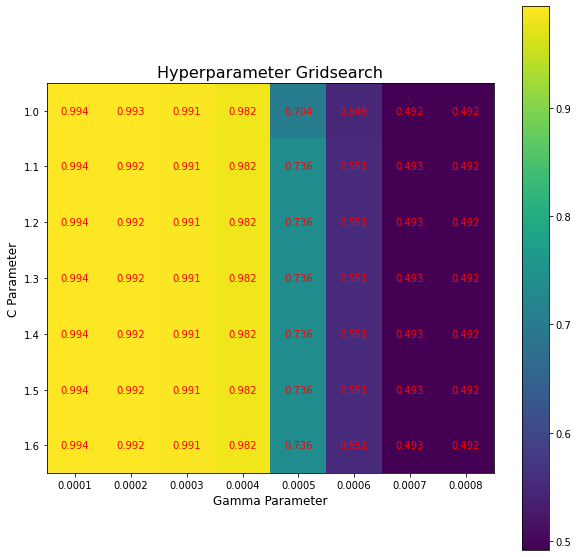

[[0.99357143 0.99257143 0.99085714 0.982      0.70414286 0.54914286
  0.492      0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98228571 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.99085714 0.98214286 0.736      0.55142857
  0.49257143 0.49171429]
 [0.99357143 0.99242857 0.991      0.98214286 0.736      0.55142857
  0.49257143 0.49171429]]


In [22]:
import matplotlib.pyplot as plt

x_label = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] # gamma
y_label = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6] # c

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xticks(np.arange(len(x_label)))
ax.set_xticklabels(x_label)
ax.set_yticks(np.arange(len(y_label)))
ax.set_yticklabels(y_label)

# j i
# 0 0
# 0 1
for j in range(acc.shape[1]):  # col
    for i in range(acc.shape[0]):  # row
        text = ax.text(j, i, np.round(acc[i][j], 3), ha="center", va="center", color="red")

ax.set_title('Hyperparameter Gridsearch', fontsize=16)
ax.set_ylabel('C Parameter', fontsize=12)
ax.set_xlabel('Gamma Parameter', fontsize=12)

plt.imshow(acc)
plt.colorbar()
plt.show()

print(acc)

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [23]:
best_model = SVC(C=best_c, kernel='rbf', gamma=best_gamma)
best_model.fit(x_train, y_train)

SVC(gamma=0.0001)

In [25]:
y_pred = best_model.predict(x_test)

In [ ]:
print("Accuracy score: ", accuracy_score(y_pred, y_test))